# Pytochondrion demo

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from pytochondrion.simulators import mitochondrial_simulator
from pytochondrion.utilities import calculate_values

In [3]:
# initial values (*from BK*)
nadh_0 = 822
uqh_0 = 1143
c2plus_0 = 60.89
o2_0 = 240 # (*from BK (1991)*)
h_i_0 = 0.037
atp_ti_0 = 6987
pi_ti_0 = 7020
atp_te_0 = 6668
adp_te_0 = 31.7
pi_te_0 = 2599
pcr_0 = 6000 # 12219

Y_0 = [nadh_0, uqh_0, c2plus_0, o2_0, h_i_0, atp_ti_0, pi_ti_0, atp_te_0, adp_te_0, pi_te_0, pcr_0]

In [4]:
initial_ode_solution = mitochondrial_simulator([0, 5], initial_values=Y_0)

Plot the solution


In [8]:
def plot_ode_output(ode_solution):
    fig, ax = plt.subplots()
    Y, t = ode_solution['y'], ode_solution['t']
    labels = ["nadh", "uqh", "c2plus", "o2", "h_i", "atp_ti", "pi_ti", "atp_te", "adp_te", "pi_te", "pcr"]
    # ax.plot(t, Y.T);
    for y, label in zip(Y, labels):
        ax.plot(t, y, label=label)
    ax.legend();

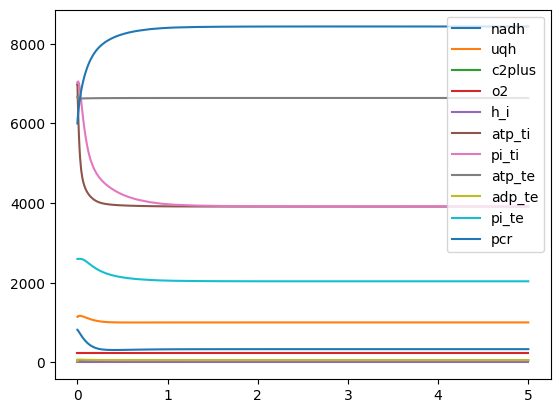

In [9]:
plot_ode_output(initial_ode_solution)

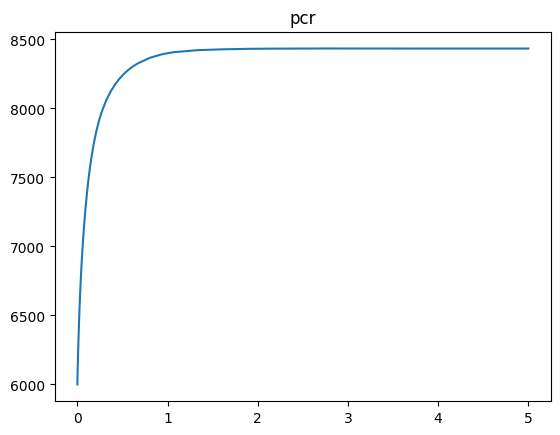

In [10]:
Y, t = initial_ode_solution['y'], initial_ode_solution['t']
labels = ["nadh", "uqh", "c2plus", "o2", "h_i", "atp_ti", "pi_ti", "atp_te", "adp_te", "pi_te", "pcr"]
fig, ax = plt.subplots()
plt.plot(t, Y[10])
plt.title(labels[10]);

Now calculate other metabolites values from the ODE solution and plot a few

In [11]:
calculated_values = calculate_values(Y)
print("Available metabolites: ", calculated_values.keys())

Available metabolites:  dict_keys(['adp_ti', 'atp_fe', 'nad', 'uq', 'pH_i', 'deltapH', 'deltap', 'delta_psi', 'amp_e', 'cr', 'atp_tot', 'pi_tot', 'adp_tot'])


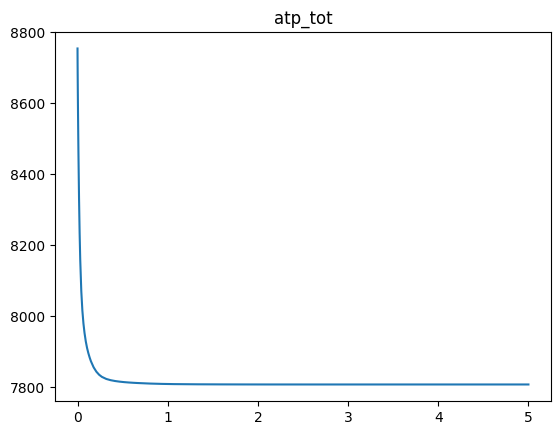

In [12]:
metabolite = 'atp_tot'
fig, ax = plt.subplots()
plt.plot(t, calculated_values[metabolite])
plt.title(metabolite);

## Now let's try some 'live' simulations

In [13]:
step_size = 0.01
solution = [Y_0]
t = [0]
current_t = t[0]
ode_solution = mitochondrial_simulator([0, step_size], initial_values=Y_0)
closing_values = ode_solution['y'][:, -1]

In [14]:

for i in range(500):
    ode_solution = mitochondrial_simulator(t_range=[current_t, current_t + step_size], initial_values=closing_values)
    closing_values = ode_solution['y'][:, -1]
    solution.append(closing_values)
    t.append(current_t)
    current_t += step_size


Text(0.5, 1.0, 'One-shot solution')

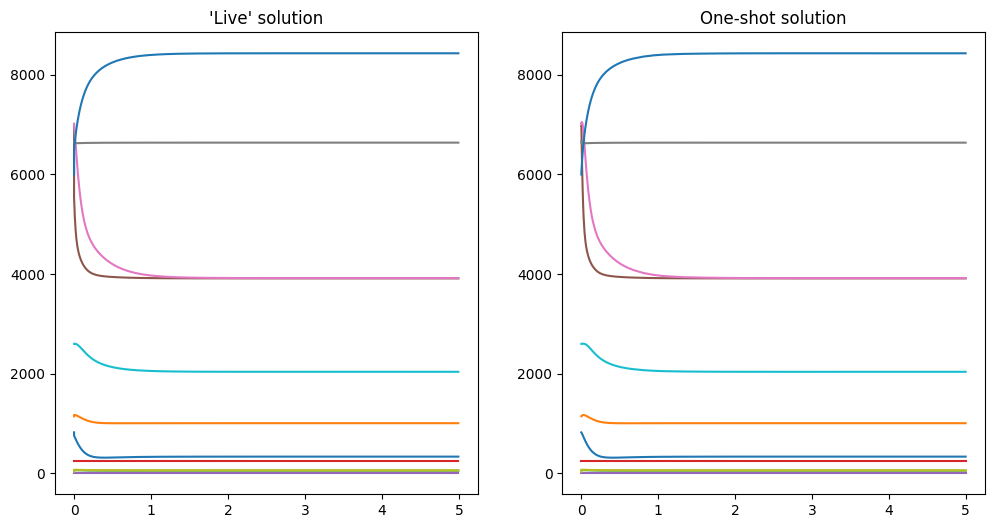

In [24]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(1, 2)
ax[0].plot(t, solution)
ax[0].set_title("'Live' solution")
ax[1].plot(initial_ode_solution['t'], initial_ode_solution['y'].T)
ax[1].set_title("One-shot solution")


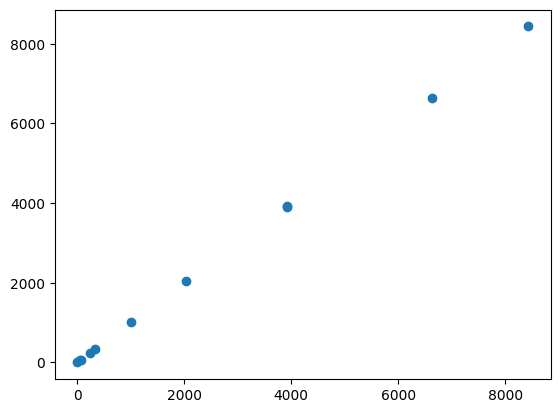

In [79]:
# check that the steady-state values are the same from both approaches
plt.scatter(ode_solution['y'][:, -1], solution[-1]);